# The Pandas Reference Notebook

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 100)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Import Options

### Importing Selected Columns, Parsing DateTime Columns

In [2]:
dummy_importable_data = pd.DataFrame({'COLUMN_A':[0,1,2,3],
                                      'COLUMN_B':["A","B","C","D"],
                                      'COLUMN_C':["AYY","BEE","SEE","DEE"],
                                      'COLUMN_DT1':["2018-03-01","2018-03-02","2018-03-03","2018-03-04"],
                                      'COLUMN_DT2':["2018-03-11","2018-03-12","2018-03-13","2018-03-14"]
                                     })
dummy_importable_data.to_csv('data.csv', index=False)

In [3]:
df = pd.read_csv("data.csv",
                 sep=',',
                 index_col='COLUMN_A',
                 usecols=['COLUMN_A', 'COLUMN_B',
                          'COLUMN_C', 'COLUMN_DT1',
                          'COLUMN_DT2'],
                 parse_dates=['COLUMN_DT1', 'COLUMN_DT2']
                 )

## Data Cleaning

### Nulls

#### Count Nulls

In [4]:
df.isnull().sum()

COLUMN_B      0
COLUMN_C      0
COLUMN_DT1    0
COLUMN_DT2    0
dtype: int64

#### Fill NAs with Numeric Mean

In [5]:
df = df.fillna(df.mean())

#### Remove Columns with greater than half NAs

In [6]:
half_count = len(df) / 2
df = df.dropna(thresh=half_count, axis=1)

### Column Manipulation

#### Remove Prefixes and Suffixes and Change to Numeric

In [7]:
df = pd.DataFrame({'percentages': ["1%", "2%", "3%"],
                   'dollars': ['$1', '$2', '$3']
                   })

# Convert object columns to float columns
df["percentages_numeric"] = df["percentages"].str.rstrip('%').astype("float")
df["dollars_numeric"] = df["dollars"].str.lstrip('$').astype("float")

df

,percentages,dollars,percentages_numeric,dollars_numeric
0,1%,$1,1.0,1.0
1,2%,$2,2.0,2.0
2,3%,$3,3.0,3.0


#### Select only Columns of certain type

In [8]:
numeric_df = df.select_dtypes(include=['int64', 'float'], exclude=None)
numeric_df

,percentages_numeric,dollars_numeric
0,1.0,1.0
1,2.0,2.0
2,3.0,3.0


## Preliminary Data Visualization

### Correlation Heatmap

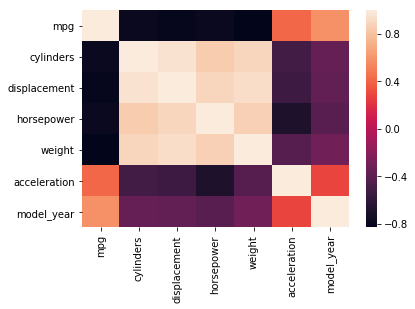

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

cars = sns.load_dataset('mpg')
cars.head()

sns.heatmap(cars.corr())
plt.show()

## Data Preparation

### Column and Index Management (rename, reset index, sort)

In [10]:
df_a = pd.DataFrame({'REVENUE':[2,1,3,2,6],
                     'MONTH':["JAN","JAN","FEB","FEB","FEB"],
                     'DAY':[30,31,1,2,3]
                    })


df_a.sort_values("REVENUE",ascending=False)\
.reset_index()\
.rename(columns={"index":"OLD INDEX",
                     "REVENUE":"PROJECTED_REVENUE"
                    })

,OLD INDEX,PROJECTED_REVENUE,MONTH,DAY
0,4,6,FEB,3
1,2,3,FEB,1
2,0,2,JAN,30
3,3,2,FEB,2
4,1,1,JAN,31


### Transpose

In [11]:
df_a = df_a.transpose()
df_a

,0,1,2,3,4
REVENUE,2,1,3,2,6
MONTH,JAN,JAN,FEB,FEB,FEB
DAY,30,31,1,2,3


### Shuffle and Split

In [12]:
# Reshuffle Row Wise
df = df.sample(frac=1.0, random_state=42)

# Splitting the Data Set
train = df.sample(frac=0.8, random_state=1)
test = df[~df.index.isin(train.index)]

### Dummy Categorical Variables

In [13]:
df = pd.DataFrame({'COLOUR': ['BLACK','WHITE','BLACK','BLACK','WHITE','BLACK'],
                   'SIZE': ['SMALL','SMALL','SMALL','BIG','BIG','BIG']
                  })
print(df)
DUMMY_CAT_A = pd.get_dummies(df["COLOUR"], prefix="COLOUR")
df = pd.concat([df, DUMMY_CAT_A], axis=1)

DUMMY_CAT_B = pd.get_dummies(df["SIZE"], prefix="SIZE")
df = pd.concat([df, DUMMY_CAT_B], axis=1)

df.drop(["COLOUR","SIZE"], inplace=True, axis=1)

print()
print(df)

  COLOUR   SIZE
0  BLACK  SMALL
1  WHITE  SMALL
2  BLACK  SMALL
3  BLACK    BIG
4  WHITE    BIG
5  BLACK    BIG

   COLOUR_BLACK  COLOUR_WHITE  SIZE_BIG  SIZE_SMALL
0             1             0         0           1
1             0             1         0           1
2             1             0         0           1
3             1             0         1           0
4             0             1         1           0
5             1             0         1           0


### String Accessors

#### String Column Split

In [14]:
df = pd.DataFrame({'ABC': ['A1-B1-C1', 'A2-B2-C2']})

df['ABC'].str.split('-', 2).str[1]

0    B1
1    B2
Name: ABC, dtype: object

#### Regex Extract

In [15]:
df = pd.DataFrame({'ADDRESS_LINE': ['1 PARK LANE, Singapore 123874', '77 United Ave, Singapore 474747']})

df["POSTAL_CODE"] = df["ADDRESS_LINE"].str.extract(r'([0-9]{6}(?=$|\,))', expand=False)
df["POSTAL_CODE"]

0    123874
1    474747
Name: POSTAL_CODE, dtype: object

#### String Length

In [16]:
df["ADDRESS_LINE"].str.len()

0    29
1    31
Name: ADDRESS_LINE, dtype: int64

#### Contains Filter

In [17]:
df = pd.DataFrame({"FIRST_NAME":["John Doe","Jane Doe","Mary Jane","Mary Joe"]})

print(df)

df_johns_marys = df.loc[(df['FIRST_NAME'].str.lower().str.contains("john")) |
                        (df['FIRST_NAME'].str.lower().str.contains("mary"))
                       ].copy()

print()
print(df_johns_marys)

  FIRST_NAME
0   John Doe
1   Jane Doe
2  Mary Jane
3   Mary Joe

  FIRST_NAME
0   John Doe
2  Mary Jane
3   Mary Joe


### Datetime Accessor

#### Get Hour and Date

In [18]:
df = pd.read_csv("WAVES.csv",
                 usecols=["Date/Time"],
                 parse_dates=["Date/Time"],
                 nrows=5)

df["Date"] = df["Date/Time"].dt.date
df["Hour"] = df["Date/Time"].dt.hour
df["Minute"] = df["Date/Time"].dt.minute
df["Second"] = df["Date/Time"].dt.second

df

,Date/Time,Date,Hour,Minute,Second
0,2017-01-01 00:00:00,2017-01-01,0,0,0
1,2017-01-01 00:30:00,2017-01-01,0,30,0
2,2017-01-01 01:00:00,2017-01-01,1,0,0
3,2017-01-01 01:30:00,2017-01-01,1,30,0
4,2017-01-01 02:00:00,2017-01-01,2,0,0


#### Get Time Difference in Seconds

In [19]:
from datetime import timedelta

df["Date/Time 2"] = df["Date/Time"] + pd.Series([timedelta(np.random.rand()) for row in range(df.shape[0])])

df["TIME_DIFF"] = df['Date/Time 2'] - df['Date/Time']
df["TIME_DIFF_SECONDS"] = df["TIME_DIFF"].dt.seconds

df

,Date/Time,Date,Hour,Minute,Second,Date/Time 2,TIME_DIFF,TIME_DIFF_SECONDS
0,2017-01-01 00:00:00,2017-01-01,0,0,0,2017-01-01 00:26:21.103990,00:26:21.103990,1581
1,2017-01-01 00:30:00,2017-01-01,0,30,0,2017-01-01 10:11:19.981028,09:41:19.981028,34879
2,2017-01-01 01:00:00,2017-01-01,1,0,0,2017-01-01 15:13:36.872083,14:13:36.872083,51216
3,2017-01-01 01:30:00,2017-01-01,1,30,0,2017-01-01 02:36:19.997328,01:06:19.997328,3979
4,2017-01-01 02:00:00,2017-01-01,2,0,0,2017-01-01 15:43:31.736869,13:43:31.736869,49411


## Joining and Merging

### Basic Left Join

In [20]:
df_a = pd.DataFrame({'REVENUE':[2,1,3,2,6],
                     'MONTH':["JAN","JAN","FEB","FEB","FEB"],
                     'DAY':[30,31,1,2,3]
                    })

df_b = pd.DataFrame({'COSTS':[1,2,3],
                     'MONTH':["JAN","JAN","FEB"],
                     'DAY':[30,31,1],
                     'REVENUE':[2,2,1]
                    })

df_merged = pd.merge(left=df_a,
                     right=df_b,
                     on=["MONTH",
                         "DAY"],
                     how="left",
                     suffixes=("_PROJECTED","_FINAL")
                    )

df_merged

,REVENUE_PROJECTED,MONTH,DAY,COSTS,REVENUE_FINAL
0,2,JAN,30,1.0,2.0
1,1,JAN,31,2.0,2.0
2,3,FEB,1,3.0,1.0
3,2,FEB,2,NaN,NaN
4,6,FEB,3,NaN,NaN


### Stacking and Unstacking

In [21]:
index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
                                   ('two', 'a'), ('two', 'b')])
s = pd.Series(np.arange(1.0, 5.0), index=index)
s

one  a    1.0
     b    2.0
two  a    3.0
     b    4.0
dtype: float64

In [22]:
s.unstack(level=-1)

,a,b
one,1.0,2.0
two,3.0,4.0


In [23]:
s.unstack(level=0)

,one,two
a,1.0,3.0
b,2.0,4.0


In [24]:
s = s.unstack(level=0)

In [25]:
s.stack()

a  one    1.0
   two    3.0
b  one    2.0
   two    4.0
dtype: float64

## Aggregation and Groupby

In [26]:
df = pd.DataFrame(np.random.randint(1,10,(10,4)), columns=list('ABCD'))
df['G1'] = [0, 0, 1, 1, 1, 1, 2, 2, 2, 3]
df['G2'] = ["X", "X", "X", "X", "O", "O", "X", "O", "O", "O"]
df

,A,B,C,D,G1,G2
0,5,5,9,9,0,X
1,4,6,3,1,0,X
2,5,8,8,7,1,X
3,2,1,9,5,1,X
4,2,7,6,6,1,O
5,1,9,2,6,1,O
6,2,9,8,1,2,X
7,9,6,6,2,2,O
8,8,8,3,8,2,O
9,9,2,8,8,3,O


### Basic Aggregation

In [27]:
df.groupby(["G1","G2"]).mean()

A    B    C    D
G1 G2                    
0  X   4.5  5.5  6.0  5.0
1  O   1.5  8.0  4.0  6.0
   X   3.5  4.5  8.5  6.0
2  O   8.5  7.0  4.5  5.0
   X   2.0  9.0  8.0  1.0
3  O   9.0  2.0  8.0  8.0

### Custom Aggregation

In [28]:
df

,A,B,C,D,G1,G2
0,5,5,9,9,0,X
1,4,6,3,1,0,X
2,5,8,8,7,1,X
3,2,1,9,5,1,X
4,2,7,6,6,1,O
5,1,9,2,6,1,O
6,2,9,8,1,2,X
7,9,6,6,2,2,O
8,8,8,3,8,2,O
9,9,2,8,8,3,O


In [29]:
df.groupby(["G1", "G2"]).agg(sum_A=('A', 'sum'),
                             max_A=('A', 'max'),
                             mean_B=('B', 'mean'),
                             sum_C=('C', 'sum'),
                             median_C=('C', 'median'),
                             lambda_D=('D', lambda x: x.max() - x.min())
                             )

sum_A  max_A  mean_B  sum_C  median_C  lambda_D
G1 G2                                                 
0  X       9      5     5.5     12       6.0         8
1  O       3      2     8.0      8       4.0         0
   X       7      5     4.5     17       8.5         2
2  O      17      9     7.0      9       4.5         6
   X       2      2     9.0      8       8.0         0
3  O       9      9     2.0      8       8.0         0

### Widow Functions

#### Rank Over Partition

In [30]:
df = pd.DataFrame(np.random.randint(1,10,(10,4)), columns=list('ABCD'))
df['G1'] = [0, 0, 1, 1, 1, 1, 2, 2, 2, 3]
df['G2'] = ["TYPE_A", "TYPE_A", "TYPE_A", "TYPE_A", "TYPE_B", "TYPE_B", "TYPE_A", "TYPE_B", "TYPE_B", "TYPE_B"]
df

df['RANK'] = df.sort_values(['A','B'], ascending=[True,False]) \
             .groupby(['G2']) \
             .cumcount() + 1

df.sort_values(['G2','A','B'], ascending=[True,True,False])

,A,B,C,D,G1,G2,RANK
0,1,8,3,5,0,TYPE_A,1
3,5,4,3,5,1,TYPE_A,2
2,6,7,6,6,1,TYPE_A,3
6,7,3,5,5,2,TYPE_A,4
1,8,2,7,3,0,TYPE_A,5
5,2,5,7,6,1,TYPE_B,1
8,3,8,4,5,2,TYPE_B,2
9,3,2,6,6,3,TYPE_B,3
7,7,3,5,2,2,TYPE_B,4
4,9,3,4,5,1,TYPE_B,5


#### Cumulative Sum

In [31]:
df = pd.DataFrame(np.random.randint(1, 50, (10, 2)),
                  columns=['COST', 'REVENUE'])

df['DAY'] = [1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
df['SHOP'] = ['A', 'A', 'A', 'A', 'A',
              'B', 'B', 'B', 'B', 'B', ]

df.groupby(by=['SHOP', 'DAY']).sum().groupby(["SHOP"]).cumsum().reset_index()

,SHOP,DAY,COST,REVENUE
0,A,1,41,12
1,A,2,55,42
2,A,3,74,53
3,A,4,102,82
4,A,5,146,100
5,B,1,13,29
6,B,2,21,55
7,B,3,25,71
8,B,4,39,92
9,B,5,73,115


## Misc

### Calculating Entropy of a 2 Class Column

In [32]:
import math

df = pd.DataFrame({"A":[0,0,0,0,0,0,0,0,1,1,1,1]})

prob_1 = df[df["A"]==1].shape[0]/df.shape[0]
prob_0 = df[df["A"]==0].shape[0]/df.shape[0]

df_entropy = -( (prob_1*math.log(prob_1,2)) + (prob_0*math.log(prob_0,2)) )
df_entropy

0.9182958340544896

## Non-Pandas Useful

### Smallest or Largest Key in a Dictionary

In [33]:
abd = {0: 8.165, 1: 4.041,
       2: 3.025, 3: 17.652, 4: 14.111}

print("Key of smallest value in dict:", min(abd, key=abd.get))
print("Key of  largest value in dict:", max(abd, key=abd.get))

Key of smallest value in dict: 2
Key of  largest value in dict: 3


### Find Index of Max in List

In [34]:
my_list = [10,30,20,500,30,50]
print("Position index of highest value in my_list:", my_list.index(max(my_list)))

Position index of highest value in my_list: 3


### Function Mapping/Filtering

In [35]:
strings = ["12.1", "13.0", "14.4"]
floats = list(map(float,strings))

passwords = ["123321", "password", "wrong", "palindrordnilap"]

pw_lengths = list(map(len,passwords))
print(pw_lengths)

[6, 8, 5, 15]


In [36]:
# Filter returns a True or False Boolean
def is_palindrome(my_string):
    return my_string == my_string[::-1]

palindrome_passwords = list(filter(is_palindrome,passwords))
print(palindrome_passwords)

['123321', 'palindrordnilap']


### Summing A List of Dictionaries Values to a Single Dictionary¶

In [37]:
from collections import Counter

a = {"a":20,
    "b":10,}

b = {"b":40,
    "c":10,}

dict_list = [a,b]

sum_dict = sum(map(Counter, dict_list),Counter())

# Counter count Object -> dict object
dict(sum_dict)

{'a': 20, 'b': 50, 'c': 10}

### Get Index of 3 Highest Value in Array in no Particular Order

In [38]:
array = np.asarray([100.0,10.0,200.0,20.0,300.0,30.0])
np.argpartition(array,-3)[-3:]

array([0, 4, 2], dtype=int64)

## Quick Examples


### Time Series DataFrames


__Importing and Parsing Datetime columns__

In [39]:
waves = pd.read_csv('WAVES.csv',
                    parse_dates=["Date/Time"],
                    index_col="Date/Time"
                   )

# Preview Data
waves.head()

,Hs,Hmax,Tz,Tp,Peak Direction,SST
Date/Time,,,,,,
2017-01-01 00:00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
2017-01-01 00:30:00,0.875,1.39,4.421,4.506,-99.9,-99.90
2017-01-01 01:00:00,0.763,1.15,4.520,5.513,49.0,25.65
2017-01-01 01:30:00,0.770,1.41,4.582,5.647,75.0,25.50
2017-01-01 02:00:00,0.747,1.16,4.515,5.083,91.0,25.45


__Plotting all Time Series__

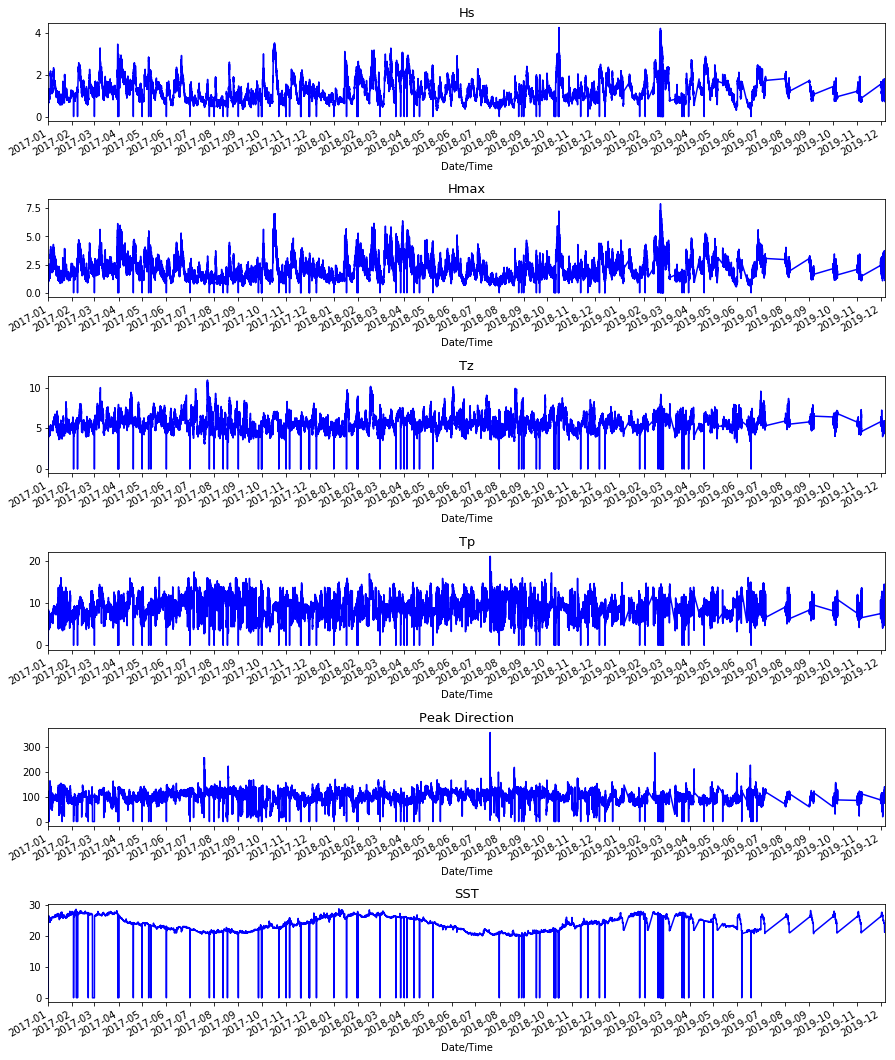

In [40]:
# Plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

fig, axes = plt.subplots(figsize=(15,20), ncols=1, nrows=6)
plt.subplots_adjust(hspace=0.8)

for i,ax in enumerate(axes):
    colname = waves.columns[i]
    
    # Remove Negative Values for Better Scaling
    plot_series = waves[colname].copy()
    plot_series.loc[plot_series<0] = 0
    plot_series.plot(ax=ax, color='b')
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.set_title(colname, fontsize=13)

__Adding Date Related Features__

In [41]:
# Get Datetime column back from index
waves["pydatetime"] = pd.to_datetime(waves.index.array)
waves["date"] = waves["pydatetime"].dt.date
waves["year"] = waves["pydatetime"].dt.year
waves["month"] = waves["pydatetime"].dt.month
waves["day"] = waves["pydatetime"].dt.day
waves["hour"] = waves["pydatetime"].dt.hour
waves["weekday"] = waves["pydatetime"].dt.weekday
waves["is_weekend"] = waves["weekday"].isin([0,1,2,3,4])

__Plot Monthly Median of a Timeseries column__

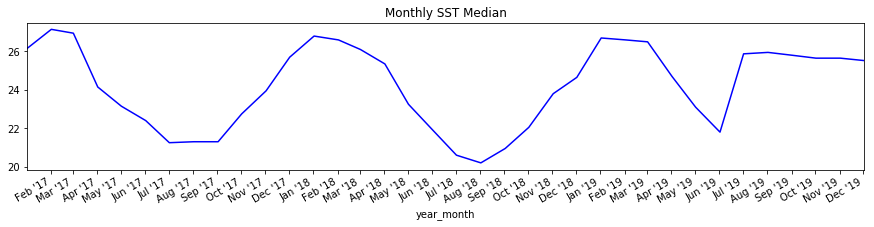

In [42]:
# Plot Monthly Median of `SST` Timeseries
fig, ax = plt.subplots(figsize=(15,3))

# Get Monthly Average
waves_monthly_SST = waves.groupby(["year","month"]).median()['SST'].reset_index()

# Get back Datetime index
waves_monthly_SST["year_month"] = pd.to_datetime(dict(year=waves_monthly_SST['year'], month=waves_monthly_SST['month'], day=2))
waves_monthly_SST.set_index("year_month",inplace=True)

# Plot
waves_monthly_SST['SST'].plot(ax=ax, color='b')

# Set ticks every Month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Format Ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b \'%y'))

# Format Tick Rotation
fig.autofmt_xdate()

plt.title("Monthly SST Median")
plt.show()

__Plot Daily Median of a Timeseries column__

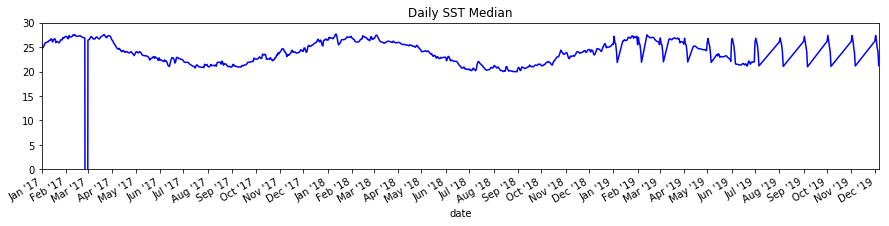

In [43]:
# Plot Daily Median of `SST` Timeseries
fig, ax = plt.subplots(figsize=(15,3))

# Get Daily Average
waves_daily_SST = waves.groupby(["date"]).median()['SST']

#set ticks every week
waves_daily_SST.plot(ax=ax, color='b')

#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b \'%y'))

# Format Dates Rotation
fig.autofmt_xdate()

# Remove Outlier Effect on Scaling
ax.set_ylim(0,30)

plt.title("Daily SST Median")
plt.show()

### Product Details DataFrames


__Importing a Product Details Dataset__

In [44]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


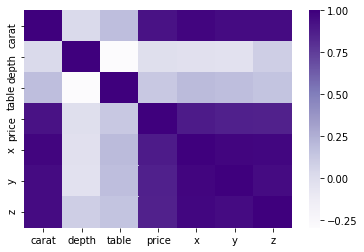

In [45]:
sns.heatmap(diamonds.corr(),cmap='Purples')

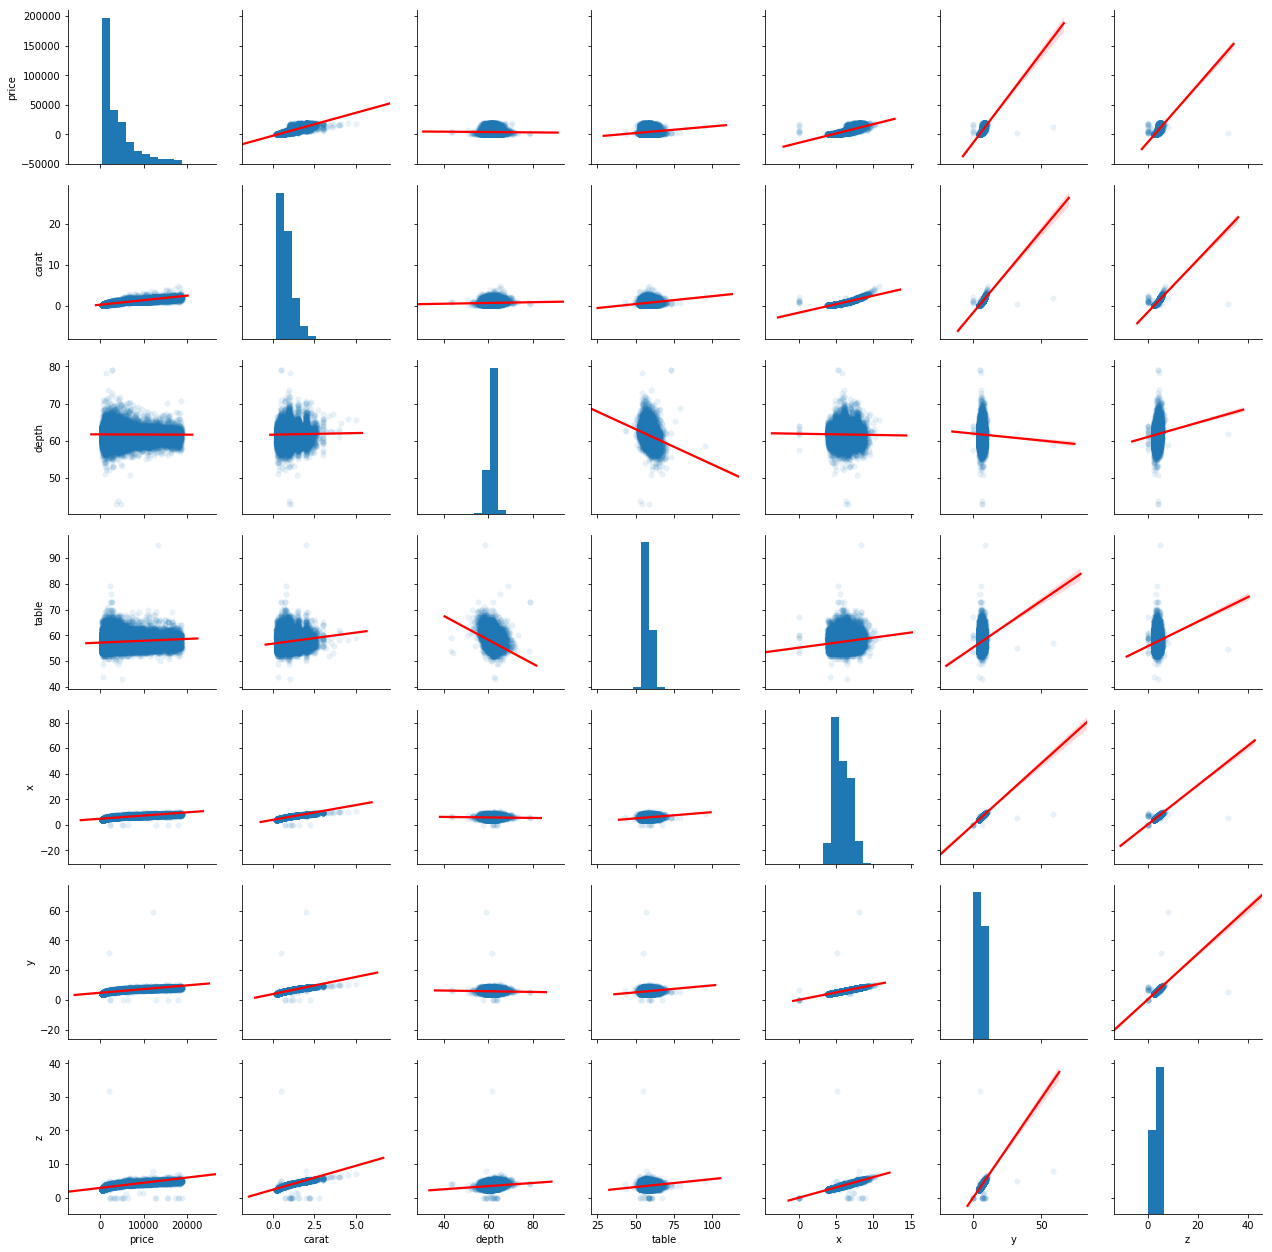

In [46]:
sns.pairplot(diamonds[['price', 'carat', 'depth', 'table', 'x', 'y', 'z']],
             kind='reg',
             plot_kws={'line_kws': {'color': 'red'},
                       'scatter_kws': {'alpha': 0.1,
                                       'edgecolor': 'k',
                                       'linewidth': 0
                                       }
                       }
            )

__Seaborn Stripplots__

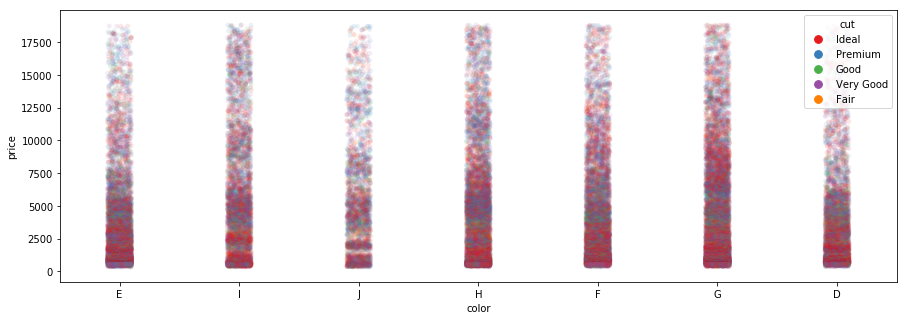

In [47]:
fig,ax = plt.subplots(figsize=(15,5))
sns.stripplot(x="color",y="price",data=diamonds,jitter=True,hue='cut', palette='Set1', alpha=0.1, ax=ax)
plt.show()

__Seaborn Violin Plots__

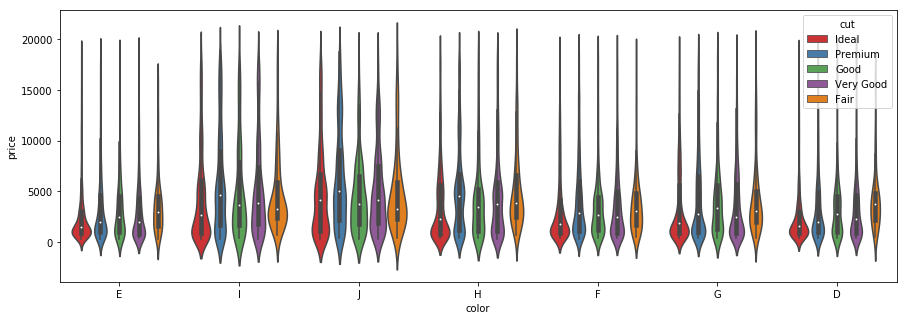

In [48]:
fig,ax = plt.subplots(figsize=(15,5))
sns.violinplot(x="color",y="price",data=diamonds,hue='cut',palette='Set1',ax=ax)
plt.show()

__Finding Mean Properties of Diamond Categories__

In [49]:
diamonds.groupby(["cut","color","clarity"]).mean()

carat      depth      table        price  \
cut       color clarity                                                
Fair      D     I1       1.877500  65.600000  56.750000  7383.000000   
                IF       0.380000  60.766667  58.000000  1619.666667   
                SI1      0.913793  64.634483  58.758621  4273.344828   
                SI2      1.016964  64.703571  58.642857  4355.142857   
                VS1      0.630000  63.160000  57.800000  2921.200000   
...                           ...        ...        ...          ...   
Very Good J     SI2      1.360938  61.835938  58.772656  5992.898438   
                VS1      0.964917  62.024167  58.043333  4339.591667   
                VS2      1.140543  61.868478  58.302717  5325.548913   
                VVS1     0.765263  61.684211  58.026316  3175.526316   
                VVS2     1.102069  62.410345  58.344828  5960.448276   

                                x         y         z  
cut       color clarity                                
Fair      D     I1       7.517500  7.422500  4.905000  
                IF       4.746667  4.686667  2.866667  
                SI1      6.010517  5.957069  3.864828  
                SI2      6.236607  6.172500  4.009107  
                VS1      5.370000  5.354000  3.492000  
...                           ...       ...       ...  
Very Good J     SI2      6.953984  6.991094  4.302969  
                VS1      6.093083  6.127417  3.785000  
                VS2      6.480109  6.513750  4.017500  
                VVS1     5.661579  5.708421  3.513158  
                VVS2     6.339310  6.368966  3.964828  

[276 rows x 7 columns]

__Find the Lowest Priced Diamonds Meeting Categorical Criteria of Cut, Color and Clarity__

In [50]:
diamonds_criteria = diamonds.loc[
    (diamonds["cut"] == 'Premium') &\
    (diamonds["color"].isin(["D","E","F"])) &\
    (diamonds["carat"] >= 1.0) &\
    (diamonds["price"] <= 4000)
]

diamonds_criteria.sort_values('price').head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
50410,1.01,Premium,F,I1,62.6,57.0,2257,6.42,6.30,3.99
51292,1.20,Premium,F,I1,62.9,58.0,2360,6.86,6.79,4.29
52055,1.02,Premium,F,I1,59.6,59.0,2452,6.51,6.45,3.87
215,1.01,Premium,F,I1,61.8,60.0,2781,6.39,6.36,3.94
634,1.00,Premium,F,I1,58.9,60.0,2841,6.60,6.55,3.87


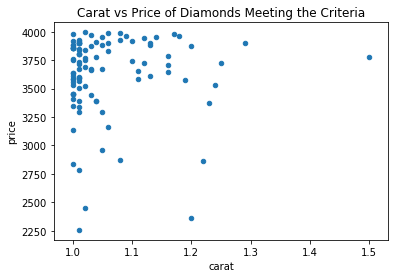

In [51]:
diamonds_criteria.plot(kind='scatter', x='carat', y='price')
plt.title('Carat vs Price of Diamonds Meeting the Criteria')
plt.show()

### Text Mining DataFrames


In [52]:
airbnb_ny = pd.read_csv("AB_NYC_2019.csv")
airbnb_ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [53]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

__Average Number of Words in  `name` by Neighbourhood__

In [54]:
airbnb_ny["name_len"] = airbnb_ny["name"].str.replace(',','').str.split().str.len()
airbnb_ny.groupby(["neighbourhood_group"]).mean()["name_len"]

neighbourhood_group
Bronx            5.736697
Brooklyn         5.889342
Manhattan        6.305930
Queens           6.196788
Staten Island    6.058981
Name: name_len, dtype: float64

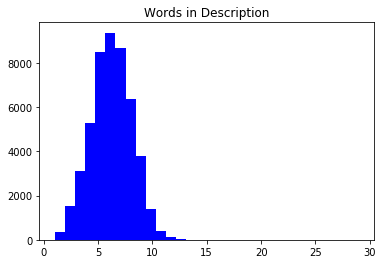

In [55]:
airbnb_ny["name_len"].hist(bins=30, grid=False, color='b')
plt.title("Words in Description")
plt.show()

In [56]:
airbnb_ny["name"].sample(10)

13787                             Cozy Room in Boerum Hill
13043    Upscale and spacious 2bed/2bath Midtown West apt.
37042    Modern 1BR Astoria, espresso maker, 5 min 2 train
715                    Landmark 2 Bedroom West Village NYC
18582     RATED ★★★★★ IN THIS 2 BEDROOM PRESIDENTIAL SUITE
14278    Bedroom with full size bed in Washington Heights!
44581                 Large private Room nearly JFK 8 mins
40495    NYC LUXURY3 BEDROOMS IN MIDTOWN EAST& GYM& BAL...
14365                    Spacious, Family-Friendly NYC Apt
42677                     luxury apartment in east village
Name: name, dtype: object

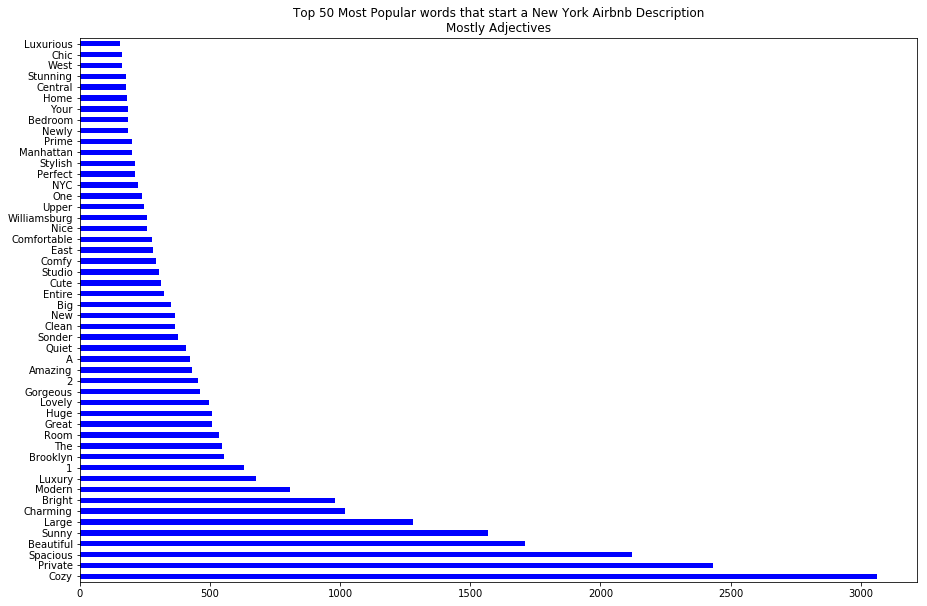

In [57]:
airbnb_ny["firstword"] = airbnb_ny["name"].str.replace(',','').str.split(n=1,expand=True)[0]
airbnb_ny['firstword'].value_counts()[:50].plot(kind='barh',color='b', figsize=(15,10))
plt.title("Top 50 Most Popular words that start a New York Airbnb Description\nMostly Adjectives")
plt.show()

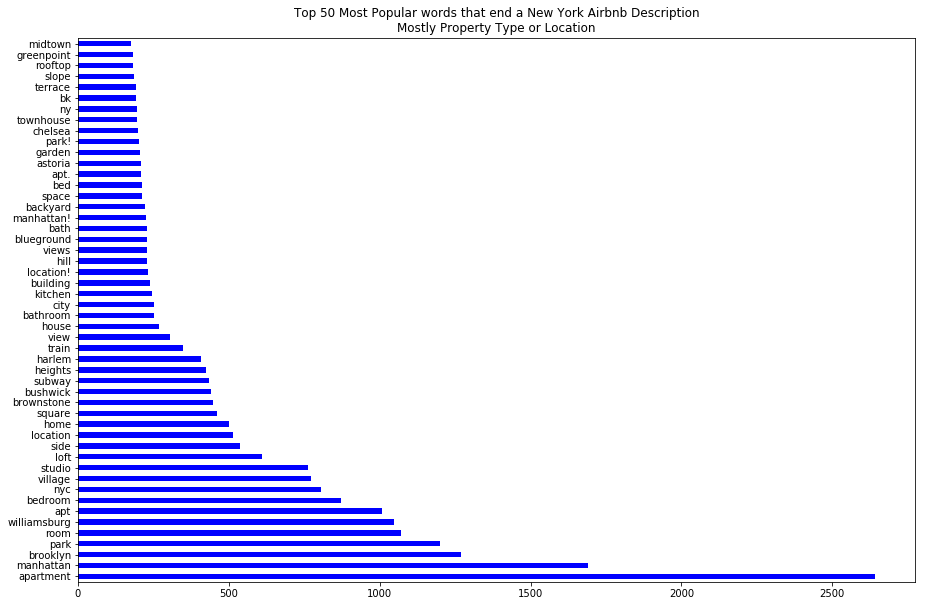

In [58]:
airbnb_ny["lastword"] = airbnb_ny["name"].str.replace(',','')\
                                         .str.lower()\
                                         .str.rsplit(n=1,expand=True)[1]
airbnb_ny['lastword'].value_counts()[:50].plot(kind='barh',color='b', figsize=(15,10))
plt.title("Top 50 Most Popular words that end a New York Airbnb Description\nMostly Property Type or Location")
plt.show()

__Price Quartiles__

In [59]:
airbnb_ny.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

__Wordcloud of Lowest 10% Priced Apartments__

There are 184535 words in the combination of all review.


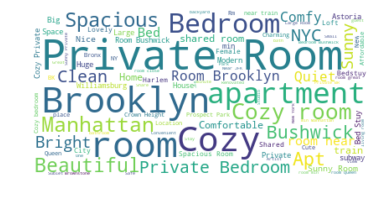

In [60]:
text = " ".join(str(review) for review in airbnb_ny.loc[airbnb_ny['price']<=airbnb_ny['price'].quantile(0.1),'name'])
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
# stopwords.update(["NYC", "Brooklyn"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

__Wordcloud of Highest 90% Priced Apartments__

There are 199317 words in the combination of all review.


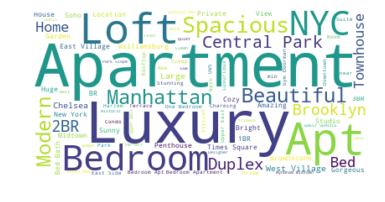

In [61]:
text = " ".join(str(review) for review in airbnb_ny.loc[airbnb_ny['price']>=airbnb_ny['price'].quantile(0.9),'name'])
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
# stopwords.update(["NYC", "Brooklyn"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Geographic Coordinates DataFrames

In [62]:
airbnb_ny = pd.read_csv("AB_NYC_2019.csv")
airbnb_ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
